In [ ]:
import ee
import geemap
import xarray as xr

!pip install xee
import xee


In [2]:
ee.Authenticate()
ee.Initialize(
    project = 'ee-lavibas23',
    opt_url = 'https://earthengine-highvolume.googleapis.com'
)

In [54]:
import ee
import geemap

# Initialize the map
Map = geemap.Map(basemap='SATELLITE')

# Define ROI (Vankalai Wetland, Mannar District)
# roi = ee.Geometry.BBox(79.975, 8.895, 80.085, 9.005)
roi = ee.Geometry.BBox(79.92, 8.85, 80.12, 9.05)


# Center the map on ROI and add it as a red layer
Map.centerObject(roi, zoom=12)
Map.addLayer(roi, {'color': 'red'}, 'ROI - Vankalai')

# Display the map!
Map





Map(center=[8.949995310099933, 80.01999999999906], controls=(WidgetControl(options=['position', 'transparent_b…

In [55]:
landsat = (
    ee.ImageCollection("LANDSAT/LC08/C02/T1_L2")
    .filterDate('2020', '2024')
    .filterBounds(roi)
    .filter(ee.Filter.lt('CLOUD_COVER',45))
)

landsat

In [57]:
landsat_mean = landsat.select('SR_B.*').mean()
landsat_mean

In [58]:
ds = xr.open_dataset(
    landsat_mean,
    engine = 'ee',
    crs = 'EPSG:4326',
    scale = 0.0001,
    geometry = roi
)


In [59]:
ds = ds * 2.75e-05 + (-0.2)

In [60]:
nir = ds.SR_B5
red = ds.SR_B4
swir2 = ds.SR_B7


In [61]:
import matplotlib.pyplot as plt

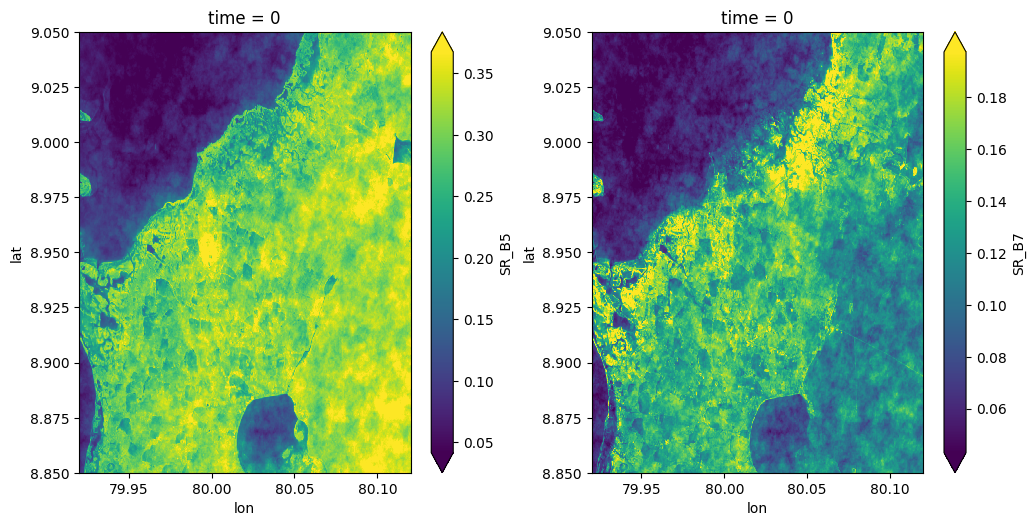

In [62]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
plt.tight_layout(w_pad = 4)

nir.plot(
    x = 'lon',
    y = 'lat',
    robust = True,
    ax = ax[0]
)

swir2.plot(
    x = 'lon',
    y = 'lat',
    robust = True,
    ax = ax[1]
)

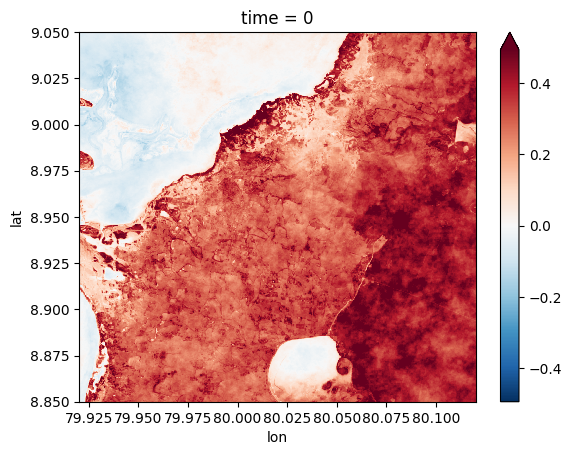

In [63]:
ndvi = (nir - red) / (nir + red)

ndvi.plot(
    x = 'lon',
    y = 'lat',
    robust = True
)

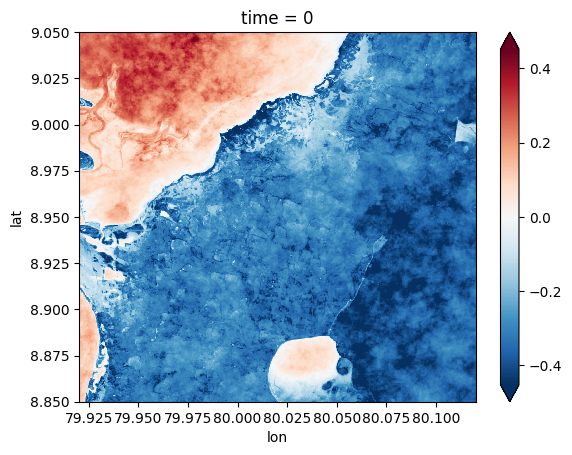

In [65]:
green = ds.SR_B3

ndwi = (green - nir) / (green + nir)

ndwi.plot(
    x = 'lon',
    y = 'lat',
    robust = True
)


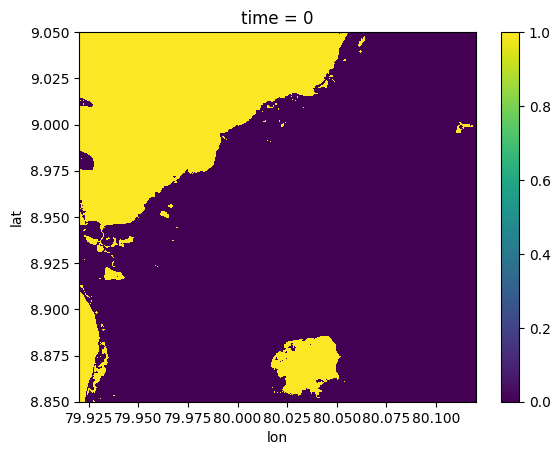

In [66]:
wiw = (nir <= 0.1735) & (swir2 <= 0.1035)

wiw.plot(
    x = 'lon',
    y = 'lat'
)

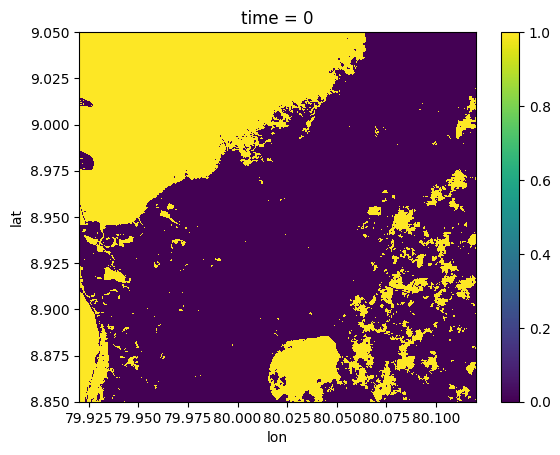

In [67]:
wiw = (nir <= 0.1735) | (swir2 <= 0.1035)

wiw.plot(
    x = 'lon',
    y = 'lat'
)